# Triple Junction Solar Cells

Triple junction solar cells consist of GaInP, GaAs, and then Ge for the bottom layer. The Ge is typically about 200 microns so we just assume it is the substrate.

In [1]:
import jax.numpy as jnp
import numpy as onp
import scipy.constants as scic

import matplotlib.pyplot as plt

from jaxlayerlumos import stackrt
from jaxlayerlumos import utils_materials
from jaxlayerlumos import utils_spectra

from jaxlayerlumos import utils_position

from jaxlayerlumos import utils_units

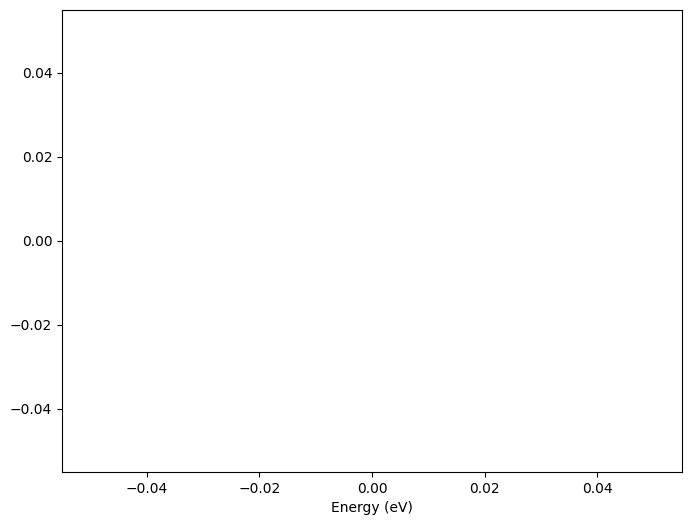

In [49]:
#wavelengths = jnp.linspace(280e-9, 2000e-9, 1000)
wavelengths = jnp.array([1000e-9])
frequencies = scic.c / wavelengths

materials = onp.array(["Air", "GaInP", "GaAs", "Ge"])
thickness_materials = [0, 1e-6, 3e-6, 0]

thicknesses = jnp.array(thickness_materials)
n_k = utils_materials.get_n_k(materials, frequencies)
theta_inc = 0
# We have to also get the coefficients back

R_TE1, T_TE1, R_TM1, T_TM1 = stackrt(
        n_k, thicknesses, frequencies, theta_inc)
# R_TE, T_TE, R_TM, T_TM, results_coeffs = stackrt(
#         n_k, thicknesses, frequencies, theta_inc, return_coeffs = True
#     )

results_coeffs = utils_position.calc_absorption_in_each_layer(
    thicknesses, results_coeffs
)
energy = utils_spectra.convert_wavelengths_to_energy(wavelengths)
plt.figure(figsize=(8, 6))

for i in range(1, 4): # loop over 3 middle layers
    plt.plot(energy, results_coeffs["absorption_layer_TE"][i,:], label=f'Layer {i+1} Absorption')


# for i in :
#
#
plt.xlabel("Energy (eV)")
# plt.ylabel("Absorption (A)")
# plt.title("Aluminum Absorption vs. Energy in Aluminum Layer")
# plt.grid(True)
results_coeffs["absorption_layer_TE"]

# results_coeffs["absorption_layer_TE"][material_silicon_index-1,:]

energy = utils_spectra.convert_wavelengths_to_energy(wavelengths)


In [50]:
#results_coeffs["absorption_layer_TE"]
# R_TE
R_TE1


Array([[1.25370002]], dtype=float64)